In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name=None):
    # Load the Excel file
    xls = pd.ExcelFile(file_path)
    # sheet_names = xls.sheet_names
    df = xls.parse(sheet_name)

    # Extract active power values
    active_power = df['peak_value'].values

    # Create time axis (in hours), assuming 288 samples evenly spaced over 24 hours
    time_hours = np.linspace(0, 24, len(active_power))

    # Plot the active power
    plt.figure(figsize=(12, 6))
    plt.plot(time_hours, active_power, label='Active Power (W)', color='blue')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Active Power (W)')
    plt.title(tile_name)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Calculate area under the curve (in Wh), then convert to kWh
    energy_kwh = np.trapezoid(active_power, time_hours) * 0.001

    # Print total energy consumed
    print("Total Energy: {:.2f} kWh".format(energy_kwh))

    # Define tariff blocks (in kWh and R/kWh)
    block1_limit = 350
    block2_limit = 500
    price_block1 = 2.097255
    price_block2 = 2.405685
    price_block3 = 2.741255

    # Determine cost based on usage
    if energy_kwh <= block1_limit:
        cost = energy_kwh * price_block1
    elif energy_kwh <= block2_limit:
        cost = (block1_limit * price_block1 +
                (energy_kwh - block1_limit) * price_block2)
    else:
        cost = (block1_limit * price_block1 +
                (block2_limit - block1_limit) * price_block2 +
                (energy_kwh - block2_limit) * price_block3)

    print("Estimated Electricity Cost: R{:.2f}".format(cost))

    # return energy_kwh, cost


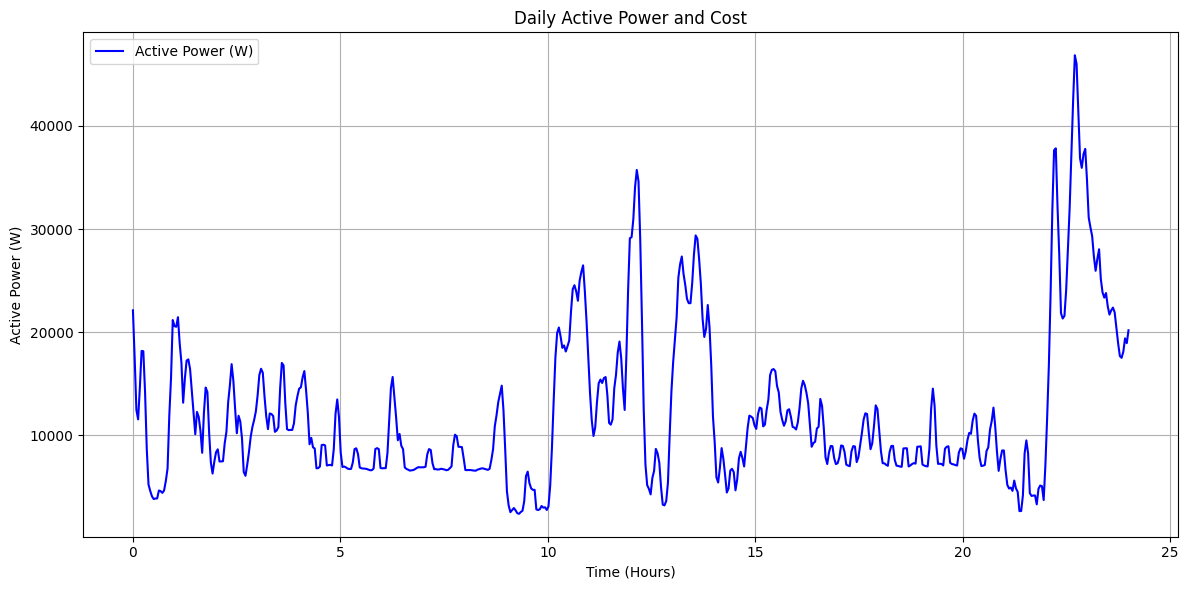

Total Energy: 289.65 kWh
Estimated Electricity Cost: R607.46


In [2]:
file_path = r"C:\Users\hp\Desktop\REG108S\Project\MatLab Data\power 20250506 110500 to 20250508 110000\Total Loads for 7Mayto8May.xlsx"
tile_name = "Daily Active Power and Cost"
calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name='Sheet1')


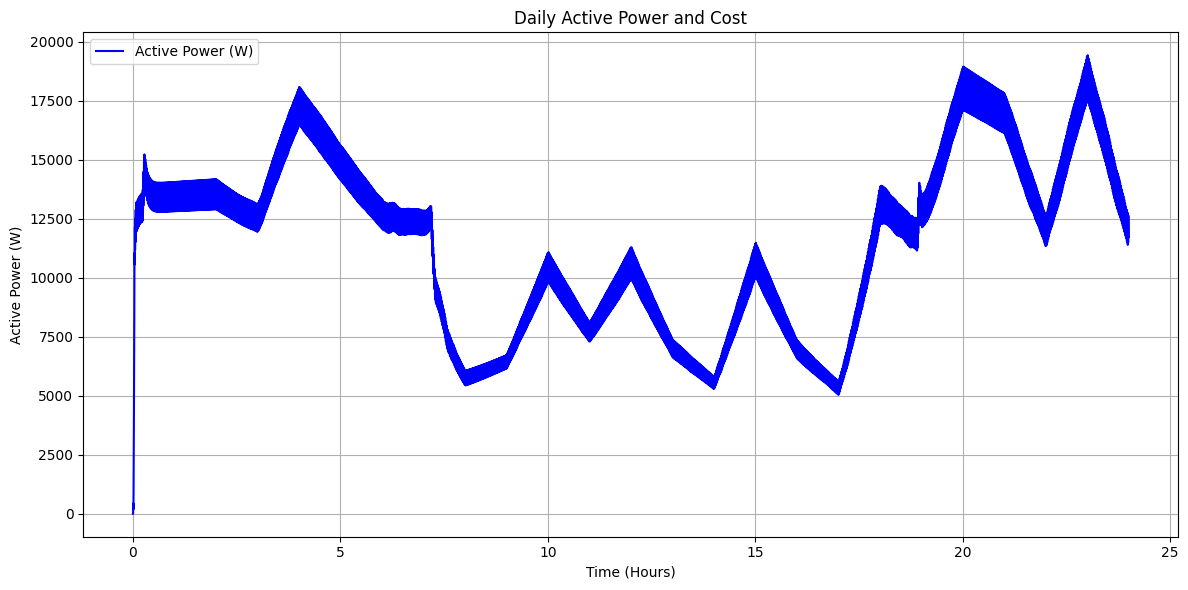

Total Energy: 275.35 kWh
Estimated Electricity Cost: R577.48


In [3]:
file_path = r"c:\Users\hp\Desktop\REG108S\Project\MatLab Data\power 20250503 to 20250504\PowerMeasuredInSimulink.xlsx"
tile_name = "Daily Active Power and Cost"
calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name='PowerGrid')

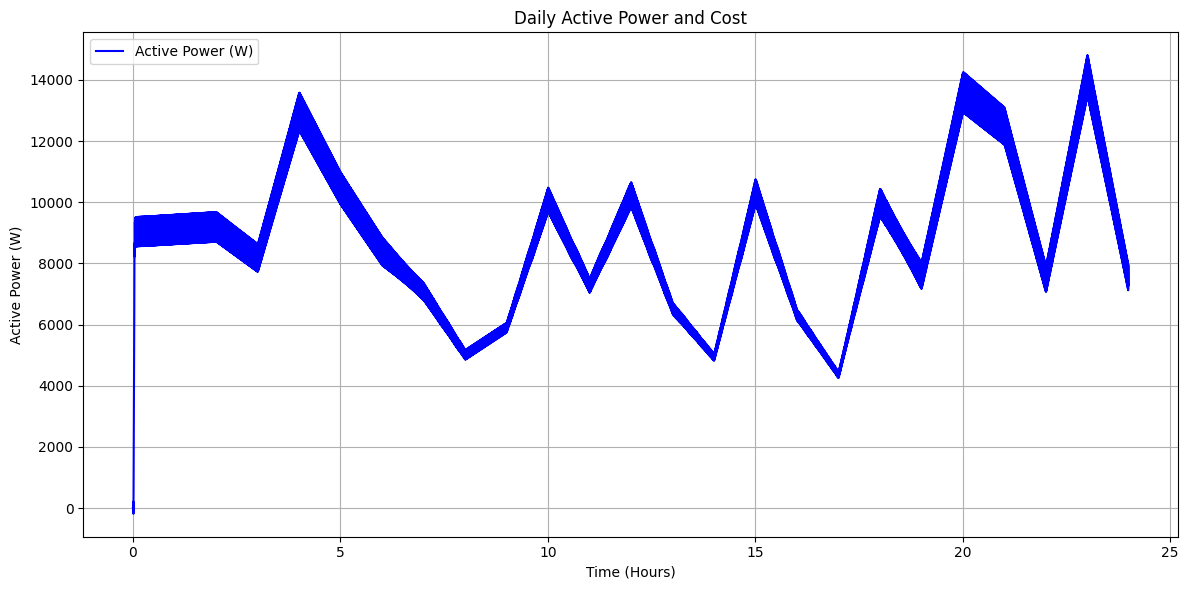

Total Energy: 209.63 kWh
Estimated Electricity Cost: R439.66


In [4]:
file_path = r"c:\Users\hp\Desktop\REG108S\Project\MatLab Data\power 20250503 to 20250504\PowerMeasuredInSimulink.xlsx"
tile_name = "Daily Active Power and Cost"
calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name='PowerLoad')

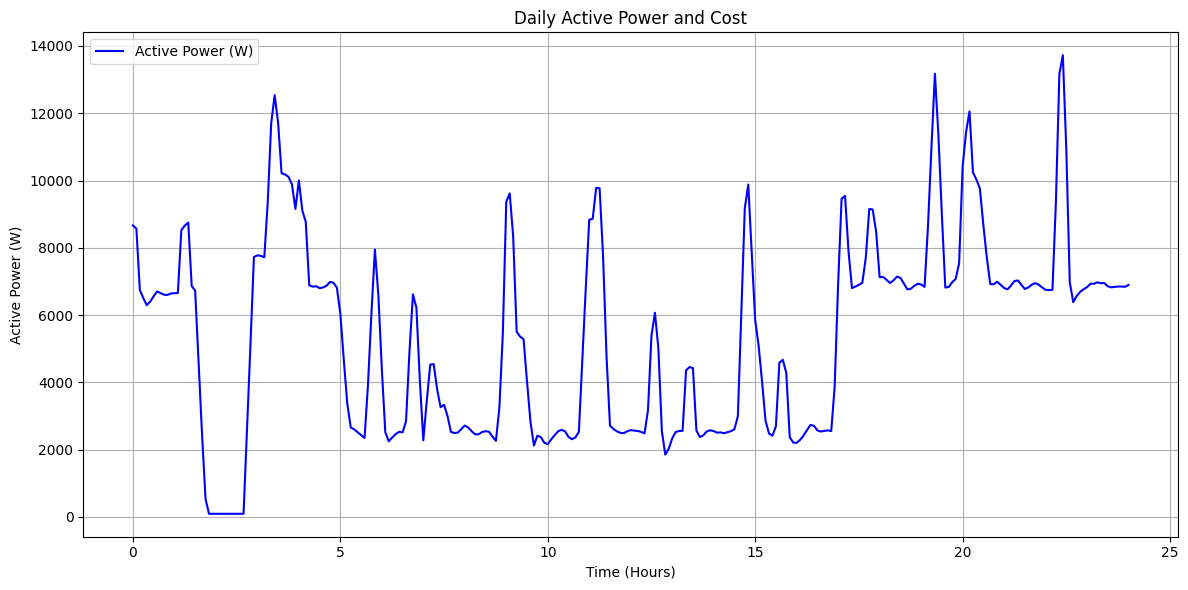

Total Energy: 129.44 kWh
Estimated Electricity Cost: R271.47


In [5]:
file_path = r"C:\Users\hp\Desktop\REG108S\Project\MatLab Data\power 20250503 to 20250504\individual_load_actual_power_profiles.xlsx"
tile_name = "Daily Active Power and Cost"
calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name='Sheet1')

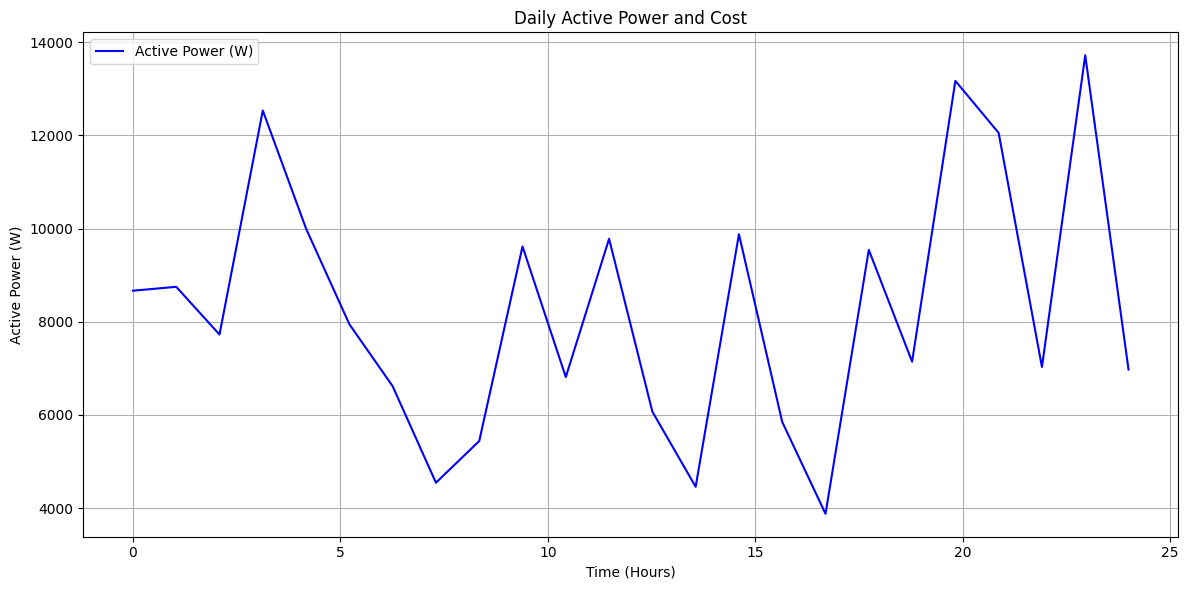

Total Energy: 198.66 kWh
Estimated Electricity Cost: R416.63


In [6]:
file_path = r"C:\Users\hp\Desktop\REG108S\Project\MatLab Data\power 20250503 to 20250504\Power 288 points to 24 points\Total.xlsx"
tile_name = "Daily Active Power and Cost"
calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name='Sheet1')

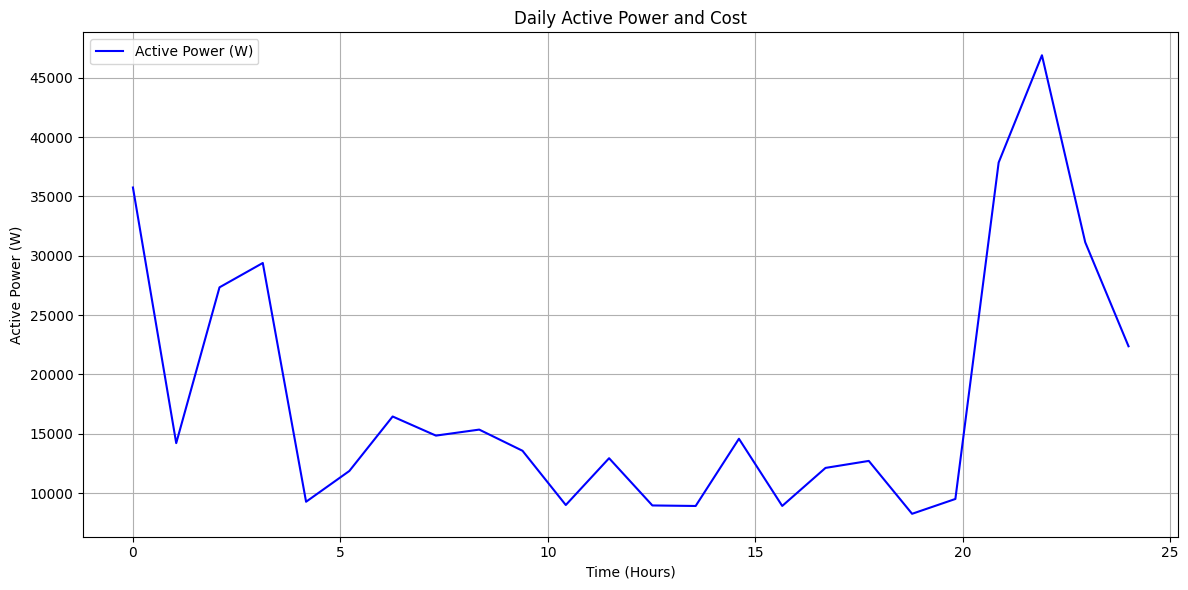

Total Energy: 420.78 kWh
Estimated Electricity Cost: R904.30


In [7]:
file_path = r"C:\Users\hp\Desktop\REG108S\Project\PythonCode\DataReduced\Total Loads for 7Mayto8May.xlsx"
tile_name = "Daily Active Power and Cost"
calculate_energy_consumption_and_cost(file_path, tile_name, sheet_name='Sheet1')